### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Problem Statement:

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates? 

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

### Reading train and test dataset:

In [2]:
train_set=pd.read_csv('train_loan.csv')
train_set

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3


In [3]:
test_set=pd.read_csv('test_loan.csv')

In [4]:
test_set

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male
109538,10273848,"2,000",5 years,Rent,37850.0,not verified,credit_card,11.60,0,NaN,10,11,Male
109539,10273849,"2,125",6 years,Rent,30000.0,not verified,other,24.88,0,NaN,5,6,Male


In [5]:
train_set.shape,test_set.shape

((164309, 14), (109541, 13))

In [6]:
train_set['Data']='train'
test_set['Data']='test'
test_set['Interest_Rate']=np.nan

In [7]:
combined=pd.concat([train_set,test_set],ignore_index=True,sort=False)

In [8]:
combined

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0,train
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0,train
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0,train
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,train
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273845,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male,NaN,test
273846,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male,NaN,test
273847,10273848,"2,000",5 years,Rent,37850.0,not verified,credit_card,11.60,0,NaN,10,11,Male,NaN,test
273848,10273849,"2,125",6 years,Rent,30000.0,not verified,other,24.88,0,NaN,5,6,Male,NaN,test


In [9]:
combined.shape

(273850, 15)

In [10]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
Loan_ID                    273850 non-null int64
Loan_Amount_Requested      273850 non-null object
Length_Employed            261543 non-null object
Home_Owner                 231790 non-null object
Annual_Income              231850 non-null float64
Income_Verified            273850 non-null object
Purpose_Of_Loan            273850 non-null object
Debt_To_Income             273850 non-null float64
Inquiries_Last_6Mo         273850 non-null int64
Months_Since_Deliquency    126612 non-null float64
Number_Open_Accounts       273850 non-null int64
Total_Accounts             273850 non-null int64
Gender                     273850 non-null object
Interest_Rate              164309 non-null float64
Data                       273850 non-null object
dtypes: float64(4), int64(4), object(7)
memory usage: 31.3+ MB


### Checking null values:

In [11]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Months_Since_Deliquency    147238
Interest_Rate              109541
dtype: int64

### Data Cleaning & Imputing null values:

In [12]:
combined.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0,train
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0,train
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0,train
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,train
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0,train


In [13]:
combined['Loan_Amount_Requested'].value_counts()

10,000    19442
12,000    15020
15,000    13848
20,000    13399
35,000     9811
          ...  
32,050        1
31,850        1
33,900        1
32,600        1
28,300        1
Name: Loan_Amount_Requested, Length: 1320, dtype: int64

In [14]:
combined['Loan_Amount_Requested']=combined['Loan_Amount_Requested'].str.replace(',','')

In [15]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
Loan_ID                    273850 non-null int64
Loan_Amount_Requested      273850 non-null object
Length_Employed            261543 non-null object
Home_Owner                 231790 non-null object
Annual_Income              231850 non-null float64
Income_Verified            273850 non-null object
Purpose_Of_Loan            273850 non-null object
Debt_To_Income             273850 non-null float64
Inquiries_Last_6Mo         273850 non-null int64
Months_Since_Deliquency    126612 non-null float64
Number_Open_Accounts       273850 non-null int64
Total_Accounts             273850 non-null int64
Gender                     273850 non-null object
Interest_Rate              164309 non-null float64
Data                       273850 non-null object
dtypes: float64(4), int64(4), object(7)
memory usage: 31.3+ MB


In [16]:
combined['Loan_Amount_Requested'].unique()

array(['7000', '30000', '24725', ..., '32700', '33450', '34425'],
      dtype=object)

In [17]:
combined['Loan_Amount_Requested']=pd.to_numeric(combined['Loan_Amount_Requested'],errors='coerce')

In [18]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Months_Since_Deliquency    147238
Interest_Rate              109541
dtype: int64

In [19]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
Loan_ID                    273850 non-null int64
Loan_Amount_Requested      273850 non-null int64
Length_Employed            261543 non-null object
Home_Owner                 231790 non-null object
Annual_Income              231850 non-null float64
Income_Verified            273850 non-null object
Purpose_Of_Loan            273850 non-null object
Debt_To_Income             273850 non-null float64
Inquiries_Last_6Mo         273850 non-null int64
Months_Since_Deliquency    126612 non-null float64
Number_Open_Accounts       273850 non-null int64
Total_Accounts             273850 non-null int64
Gender                     273850 non-null object
Interest_Rate              164309 non-null float64
Data                       273850 non-null object
dtypes: float64(4), int64(5), object(6)
memory usage: 31.3+ MB


In [20]:
combined.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0,train
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0,train
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0,train
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,train
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0,train


In [21]:
combined['Length_Employed']=combined['Length_Employed'].str.replace('<','')

In [22]:
combined['Length_Employed'].value_counts()

10+ years    88328
2 years      24420
3 years      21478
 1 year      21133
5 years      18042
1 year       17336
4 years      16393
7 years      15444
6 years      15351
8 years      13115
9 years      10503
Name: Length_Employed, dtype: int64

In [23]:
combined['Length_Employed']=combined['Length_Employed'].str.replace('+','')

In [24]:
combined['Length_Employed']=combined['Length_Employed'].str.replace('years','')

In [25]:
combined['Length_Employed'].value_counts()

10         88328
2          24420
3          21478
 1 year    21133
5          18042
1 year     17336
4          16393
7          15444
6          15351
8          13115
9          10503
Name: Length_Employed, dtype: int64

In [26]:
combined['Length_Employed']=combined['Length_Employed'].str.replace('year','')

In [27]:
combined['Length_Employed'].value_counts()

10     88328
2      24420
3      21478
 1     21133
5      18042
1      17336
4      16393
7      15444
6      15351
8      13115
9      10503
Name: Length_Employed, dtype: int64

In [28]:
combined['Length_Employed']=pd.to_numeric(combined['Length_Employed'],errors='coerce')

In [29]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Months_Since_Deliquency    147238
Interest_Rate              109541
dtype: int64

In [30]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
Loan_ID                    273850 non-null int64
Loan_Amount_Requested      273850 non-null int64
Length_Employed            261543 non-null float64
Home_Owner                 231790 non-null object
Annual_Income              231850 non-null float64
Income_Verified            273850 non-null object
Purpose_Of_Loan            273850 non-null object
Debt_To_Income             273850 non-null float64
Inquiries_Last_6Mo         273850 non-null int64
Months_Since_Deliquency    126612 non-null float64
Number_Open_Accounts       273850 non-null int64
Total_Accounts             273850 non-null int64
Gender                     273850 non-null object
Interest_Rate              164309 non-null float64
Data                       273850 non-null object
dtypes: float64(5), int64(5), object(5)
memory usage: 31.3+ MB


In [31]:
combined['Home_Owner'].value_counts()

Mortgage    117270
Rent         93542
Own          20879
Other           79
None            20
Name: Home_Owner, dtype: int64

In [32]:
combined.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
0,10000001,7000,1.0,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0,train
1,10000002,30000,4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0,train
2,10000003,24725,7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0,train
3,10000004,16000,1.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,train
4,10000005,17000,8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0,train


In [33]:
combined['Purpose_Of_Loan'].value_counts()

debt_consolidation    161403
credit_card            61394
home_improvement       15455
other                  13846
major_purchase          5712
small_business          4064
car                     3149
medical                 2633
moving                  1675
vacation                1453
wedding                 1345
house                   1316
renewable_energy         206
educational              199
Name: Purpose_Of_Loan, dtype: int64

In [34]:
a=combined[combined['Home_Owner'].isnull()]

In [35]:
a

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
3,10000004,16000,1.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,train
28,10000029,8875,8.0,NaN,26500.0,VERIFIED - income,debt_consolidation,10.14,0,NaN,6,10,Male,2.0,train
33,10000034,8875,4.0,NaN,NaN,VERIFIED - income,debt_consolidation,24.32,0,NaN,5,8,Male,1.0,train
37,10000038,21000,2.0,NaN,130000.0,VERIFIED - income,credit_card,5.25,0,64.0,8,19,Female,1.0,train
39,10000040,8400,10.0,NaN,95000.0,VERIFIED - income,debt_consolidation,17.32,0,NaN,13,41,Male,1.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273824,10273825,7550,9.0,NaN,27500.0,VERIFIED - income,debt_consolidation,17.45,2,45.0,17,28,Male,NaN,test
273826,10273827,18600,10.0,NaN,58600.0,VERIFIED - income,credit_card,23.91,0,49.0,13,25,Female,NaN,test
273838,10273839,21000,10.0,NaN,70000.0,VERIFIED - income,debt_consolidation,15.50,1,NaN,9,16,Male,NaN,test
273839,10273840,12000,4.0,NaN,42000.0,VERIFIED - income source,major_purchase,12.06,1,NaN,6,6,Male,NaN,test


In [36]:
a.loc[a.Purpose_Of_Loan=='home_improvement']

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
276,10000277,19575,5.0,NaN,44500.0,VERIFIED - income source,home_improvement,21.14,2,34.0,13,33,Male,3.0,train
330,10000331,8000,NaN,NaN,110000.0,VERIFIED - income source,home_improvement,3.64,0,24.0,6,26,Male,1.0,train
349,10000350,1200,10.0,NaN,25000.0,VERIFIED - income source,home_improvement,19.30,1,NaN,11,12,Female,3.0,train
362,10000363,12000,10.0,NaN,53000.0,not verified,home_improvement,13.99,0,37.0,4,20,Male,2.0,train
620,10000621,20000,7.0,NaN,87000.0,VERIFIED - income,home_improvement,6.58,0,66.0,12,21,Male,2.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273075,10273076,20000,10.0,NaN,119600.0,VERIFIED - income source,home_improvement,8.38,5,NaN,7,12,Male,NaN,test
273246,10273247,35000,6.0,NaN,NaN,VERIFIED - income,home_improvement,14.67,2,NaN,13,33,Female,NaN,test
273353,10273354,18000,1.0,NaN,150000.0,VERIFIED - income source,home_improvement,12.13,0,22.0,17,30,Male,NaN,test
273401,10273402,9925,4.0,NaN,40000.0,VERIFIED - income,home_improvement,10.74,1,NaN,5,5,Male,NaN,test


In [37]:
combined.loc[combined.Purpose_Of_Loan=='home_improvement','Home_Owner']='Own'

In [38]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Length_Employed             12307
Home_Owner                  39670
Annual_Income               42000
Months_Since_Deliquency    147238
Interest_Rate              109541
dtype: int64

In [39]:
combined.loc[combined.Purpose_Of_Loan=='house','Home_Owner']='Rent'

In [40]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Length_Employed             12307
Home_Owner                  39455
Annual_Income               42000
Months_Since_Deliquency    147238
Interest_Rate              109541
dtype: int64

In [41]:
combined.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
0,10000001,7000,1.0,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0,train
1,10000002,30000,4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0,train
2,10000003,24725,7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0,train
3,10000004,16000,1.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,train
4,10000005,17000,8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0,train


In [42]:
pd.DataFrame(combined.groupby('Length_Employed')['Annual_Income'].mean())

,Annual_Income
Length_Employed,
1.0,68508.445527
2.0,71205.401656
3.0,71957.938581
4.0,71144.528381
5.0,72568.713633
6.0,72207.201506
7.0,73295.970365
8.0,74649.514489
9.0,74746.396412


In [43]:
combined.Length_Employed=combined.Length_Employed.transform(lambda x:x.fillna(x.mean()))

In [44]:
combined.Annual_Income=combined.groupby('Length_Employed')['Annual_Income'].transform(lambda x:x.fillna(x.mean()))

In [45]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Home_Owner                  39455
Months_Since_Deliquency    147238
Interest_Rate              109541
dtype: int64

In [46]:
combined.Home_Owner.value_counts()

Mortgage    106608
Rent         93253
Own          34440
Other           74
None            20
Name: Home_Owner, dtype: int64

In [47]:
combined.Home_Owner=combined.Home_Owner.fillna(combined.Home_Owner.mode()[0])

In [48]:
combined.Home_Owner.value_counts()

Mortgage    146063
Rent         93253
Own          34440
Other           74
None            20
Name: Home_Owner, dtype: int64

In [49]:
combined.Home_Owner=combined.Home_Owner.replace(['None','Other'],['Mortgage']*2)

In [50]:
combined.Home_Owner.value_counts()

Mortgage    146157
Rent         93253
Own          34440
Name: Home_Owner, dtype: int64

In [51]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 15 columns):
Loan_ID                    273850 non-null int64
Loan_Amount_Requested      273850 non-null int64
Length_Employed            273850 non-null float64
Home_Owner                 273850 non-null object
Annual_Income              273850 non-null float64
Income_Verified            273850 non-null object
Purpose_Of_Loan            273850 non-null object
Debt_To_Income             273850 non-null float64
Inquiries_Last_6Mo         273850 non-null int64
Months_Since_Deliquency    126612 non-null float64
Number_Open_Accounts       273850 non-null int64
Total_Accounts             273850 non-null int64
Gender                     273850 non-null object
Interest_Rate              164309 non-null float64
Data                       273850 non-null object
dtypes: float64(5), int64(5), object(5)
memory usage: 31.3+ MB


In [52]:
combined.Income_Verified.value_counts()

VERIFIED - income           99076
VERIFIED - income source    88253
not verified                86521
Name: Income_Verified, dtype: int64

In [53]:
combined.Income_Verified=combined.Income_Verified.replace(['VERIFIED - income source','VERIFIED - income'],['Verified']*2)

In [54]:
combined.Income_Verified=combined.Income_Verified.replace('not verified','Not_Verified')

In [55]:
combined.Income_Verified.value_counts()

Verified        187329
Not_Verified     86521
Name: Income_Verified, dtype: int64

In [56]:
combined.Purpose_Of_Loan.value_counts()

debt_consolidation    161403
credit_card            61394
home_improvement       15455
other                  13846
major_purchase          5712
small_business          4064
car                     3149
medical                 2633
moving                  1675
vacation                1453
wedding                 1345
house                   1316
renewable_energy         206
educational              199
Name: Purpose_Of_Loan, dtype: int64

In [57]:
combined.Gender.value_counts()

Male      194993
Female     78857
Name: Gender, dtype: int64

In [58]:
combined.Months_Since_Deliquency.value_counts()

9.0      2585
8.0      2515
13.0     2496
12.0     2473
10.0     2463
         ... 
149.0       1
143.0       1
140.0       1
141.0       1
127.0       1
Name: Months_Since_Deliquency, Length: 132, dtype: int64

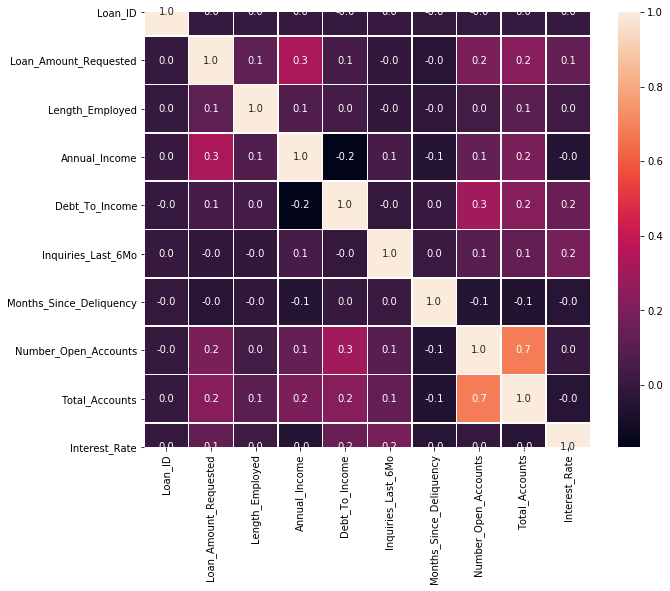

In [59]:
plt.figure(figsize=(10,8))
ax=sns.heatmap(combined.corr(),annot=True,linewidths=.5,fmt='.1f')
plt.show()

In [60]:
combined.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Data
0,10000001,7000,1.0,Rent,68000.000000,Not_Verified,car,18.37,0,NaN,9,14,Female,1.0,train
1,10000002,30000,4.0,Mortgage,71144.528381,Verified,debt_consolidation,14.93,0,17.0,12,24,Female,3.0,train
2,10000003,24725,7.0,Mortgage,75566.400000,Verified,debt_consolidation,15.88,0,NaN,12,16,Male,3.0,train
3,10000004,16000,1.0,Mortgage,56160.000000,Verified,debt_consolidation,14.34,3,NaN,16,22,Male,3.0,train
4,10000005,17000,8.0,Own,96000.000000,Verified,debt_consolidation,22.17,1,NaN,19,30,Female,1.0,train


### Dropping unnecessary columns:

In [61]:
combined.drop(['Months_Since_Deliquency','Number_Open_Accounts'],axis=1,inplace=True)

In [62]:
combined.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Total_Accounts', 'Gender', 'Interest_Rate',
       'Data'],
      dtype='object')

In [63]:
df=combined.drop('Loan_ID',axis=1)

In [64]:
df.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate,Data
0,7000,1.0,Rent,68000.000000,Not_Verified,car,18.37,0,14,Female,1.0,train
1,30000,4.0,Mortgage,71144.528381,Verified,debt_consolidation,14.93,0,24,Female,3.0,train
2,24725,7.0,Mortgage,75566.400000,Verified,debt_consolidation,15.88,0,16,Male,3.0,train
3,16000,1.0,Mortgage,56160.000000,Verified,debt_consolidation,14.34,3,22,Male,3.0,train
4,17000,8.0,Own,96000.000000,Verified,debt_consolidation,22.17,1,30,Female,1.0,train


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273850 entries, 0 to 273849
Data columns (total 12 columns):
Loan_Amount_Requested    273850 non-null int64
Length_Employed          273850 non-null float64
Home_Owner               273850 non-null object
Annual_Income            273850 non-null float64
Income_Verified          273850 non-null object
Purpose_Of_Loan          273850 non-null object
Debt_To_Income           273850 non-null float64
Inquiries_Last_6Mo       273850 non-null int64
Total_Accounts           273850 non-null int64
Gender                   273850 non-null object
Interest_Rate            164309 non-null float64
Data                     273850 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 25.1+ MB


In [66]:
from sklearn.feature_extraction import FeatureHasher
fh=FeatureHasher(n_features=6,input_type='string')
hashed_feature=fh.fit_transform(df['Purpose_Of_Loan'])
hashed_feature=hashed_feature.toarray()

In [67]:
fh=pd.DataFrame(hashed_feature)

In [68]:
df=pd.get_dummies(df,columns=['Home_Owner','Income_Verified','Gender'],drop_first=True)

In [69]:
dff=pd.concat([df,fh],axis=1,sort=False)
dff.shape

(273850, 19)

In [70]:
dff.drop('Purpose_Of_Loan',axis=1,inplace=True)

In [71]:
dff.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Interest_Rate,Data,Home_Owner_Own,Home_Owner_Rent,Income_Verified_Verified,Gender_Male,0,1,2,3,4,5
0,7000,1.0,68000.000000,18.37,0,14,1.0,train,0,1,0,0,0.0,1.0,1.0,0.0,0.0,-1.0
1,30000,4.0,71144.528381,14.93,0,24,3.0,train,0,0,1,0,-2.0,6.0,2.0,-4.0,0.0,-2.0
2,24725,7.0,75566.400000,15.88,0,16,3.0,train,0,0,1,1,-2.0,6.0,2.0,-4.0,0.0,-2.0
3,16000,1.0,56160.000000,14.34,3,22,3.0,train,0,0,1,1,-2.0,6.0,2.0,-4.0,0.0,-2.0
4,17000,8.0,96000.000000,22.17,1,30,1.0,train,1,0,1,0,-2.0,6.0,2.0,-4.0,0.0,-2.0


In [72]:
dff.shape

(273850, 18)

In [73]:
dff.head(50)

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Interest_Rate,Data,Home_Owner_Own,Home_Owner_Rent,Income_Verified_Verified,Gender_Male,0,1,2,3,4,5
0,7000,1.000000,68000.000000,18.37,0,14,1.0,train,0,1,0,0,0.0,1.0,1.0,0.0,0.0,-1.0
1,30000,4.000000,71144.528381,14.93,0,24,3.0,train,0,0,1,0,-2.0,6.0,2.0,-4.0,0.0,-2.0
2,24725,7.000000,75566.400000,15.88,0,16,3.0,train,0,0,1,1,-2.0,6.0,2.0,-4.0,0.0,-2.0
3,16000,1.000000,56160.000000,14.34,3,22,3.0,train,0,0,1,1,-2.0,6.0,2.0,-4.0,0.0,-2.0
4,17000,8.000000,96000.000000,22.17,1,30,1.0,train,1,0,1,0,-2.0,6.0,2.0,-4.0,0.0,-2.0
5,4500,2.000000,30000.000000,10.88,1,15,3.0,train,0,1,1,1,0.0,5.0,1.0,-1.0,0.0,-2.0
6,18075,4.000000,85000.000000,5.65,0,12,3.0,train,0,1,1,1,-2.0,6.0,2.0,-4.0,0.0,-2.0
7,15000,1.000000,115000.000000,7.97,1,31,2.0,train,0,1,1,0,-2.0,6.0,2.0,-4.0,0.0,-2.0
8,6300,10.000000,80274.598207,16.12,3,9,3.0,train,0,1,0,0,-2.0,6.0,2.0,-4.0,0.0,-2.0
9,30000,10.000000,163000.000000,11.13,0,43,1.0,train,1,0,1,1,-2.0,6.0,2.0,-4.0,0.0,-2.0


In [74]:
dff.skew()

Loan_Amount_Requested        0.728171
Length_Employed             -0.166402
Annual_Income               39.924735
Debt_To_Income               0.192132
Inquiries_Last_6Mo           1.545926
Total_Accounts               0.819753
Interest_Rate               -0.260932
Home_Owner_Own               2.257304
Home_Owner_Rent              0.673052
Income_Verified_Verified    -0.791834
Gender_Male                 -0.936569
0                            0.736228
1                           -2.083935
2                           -1.130296
3                            0.485383
4                            2.851190
5                            2.927945
dtype: float64

In [75]:
dff.columns

Index([   'Loan_Amount_Requested',          'Length_Employed',
                  'Annual_Income',           'Debt_To_Income',
             'Inquiries_Last_6Mo',           'Total_Accounts',
                  'Interest_Rate',                     'Data',
                 'Home_Owner_Own',          'Home_Owner_Rent',
       'Income_Verified_Verified',              'Gender_Male',
                                0,                          1,
                                2,                          3,
                                4,                          5],
      dtype='object')

### Checking distribution of numerical values:

In [76]:
l=['Inquiries_Last_6Mo','Annual_Income']

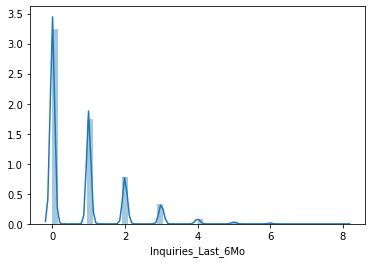

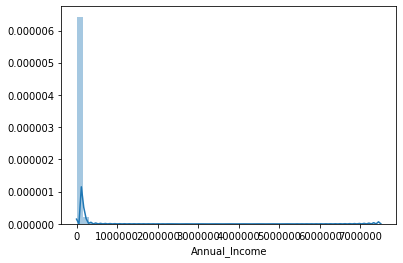

In [77]:
for i in l:
    sns.distplot(dff[i])
    plt.show()

### Checking outliers of numerical columns:

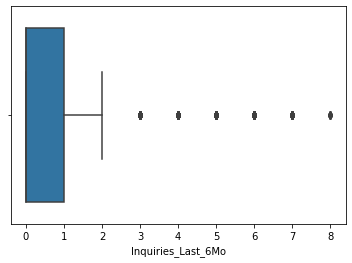

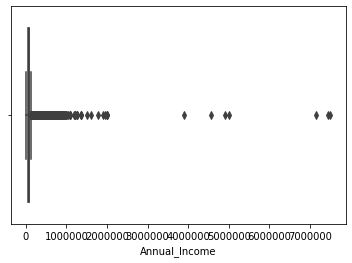

In [78]:
for i in l:
    sns.boxplot(dff[i])
    plt.show()

In [79]:
import scipy.stats as st
for i in l:
    dff[i]=list(st.boxcox(combined[i]+1)[0])
dff.skew()

Loan_Amount_Requested       0.728171
Length_Employed            -0.166402
Annual_Income              -0.008683
Debt_To_Income              0.192132
Inquiries_Last_6Mo          0.276762
Total_Accounts              0.819753
Interest_Rate              -0.260932
Home_Owner_Own              2.257304
Home_Owner_Rent             0.673052
Income_Verified_Verified   -0.791834
Gender_Male                -0.936569
0                           0.736228
1                          -2.083935
2                          -1.130296
3                           0.485383
4                           2.851190
5                           2.927945
dtype: float64

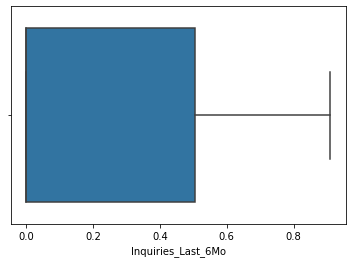

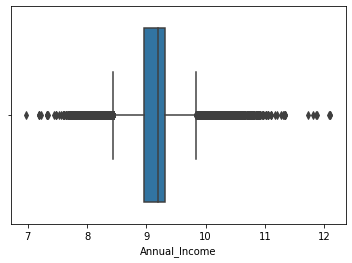

In [80]:
for i in l:
    sns.boxplot(dff[i])
    plt.show()

In [81]:
train=dff.loc[dff['Data']=='train']

In [82]:
train.shape

(164309, 18)

In [83]:
test=dff.loc[dff['Data']=='test']
test.shape

(109541, 18)

In [84]:
train=train.drop('Data',axis=1)
test=test.drop(['Data','Interest_Rate'],axis=1)

In [85]:
train.shape,test.shape

((164309, 17), (109541, 16))

In [86]:
train_set.shape,test_set.shape

((164309, 15), (109541, 15))

### Splitting train dataset into X and y:

In [87]:
X=train.drop('Interest_Rate',axis=1)
y=train['Interest_Rate']

### Checking whether the target column is balanced or not:

2.0    70580
3.0    59923
1.0    33806
Name: Interest_Rate, dtype: int64

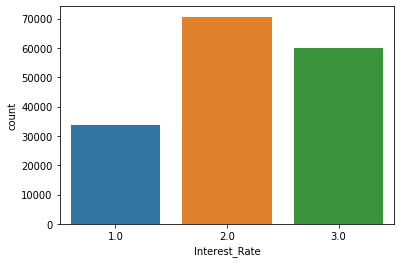

In [88]:
sns.countplot(train['Interest_Rate'])
train['Interest_Rate'].value_counts()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classe

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [91]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr',LogisticRegression())])
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     ('dt',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('rfc',RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn',KNN())])
pipeline_xgbc=Pipeline([('scalar5',StandardScaler()),
                     ('xgboost',XGBClassifier())])
pipeline_lgbc=Pipeline([('scalar6',StandardScaler()),
                     ('lgbc',lgb.LGBMClassifier())])
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     ('adaboost',AdaBoostClassifier())])
pipeline_sgdc=Pipeline([('scalar8',StandardScaler()),
                     ('sgradient',SGDClassifier())])
pipeline_nb=Pipeline([('scalar9',StandardScaler()),
                     ('nb',GaussianNB())])
pipeline_extratree=Pipeline([('scalar10',StandardScaler()),
                     ('extratree',ExtraTreesClassifier())])

In [92]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_xgbc,pipeline_lgbc,pipeline_ada,pipeline_sgdc,pipeline_nb,pipeline_extratree]

In [93]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [94]:
pipe_dict={0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'KNN',4:'XGBC',5:'LGBC',6:'ADA',7:'SGDC',8:'NB',9:'ExtraTree'}

In [95]:
for i in pipelines:
    i.fit(X_train,y_train)
    predictions=i.predict(X_test)
    print('Classification Report : \n',(classification_report(y_test,predictions)))

Classification Report : 
               precision    recall  f1-score   support

         1.0       0.52      0.13      0.21     10184
         2.0       0.48      0.67      0.56     21084
         3.0       0.56      0.54      0.55     18025

    accuracy                           0.51     49293
   macro avg       0.52      0.45      0.44     49293
weighted avg       0.52      0.51      0.49     49293

Classification Report : 
               precision    recall  f1-score   support

         1.0       0.29      0.30      0.30     10184
         2.0       0.45      0.45      0.45     21084
         3.0       0.46      0.45      0.45     18025

    accuracy                           0.42     49293
   macro avg       0.40      0.40      0.40     49293
weighted avg       0.42      0.42      0.42     49293

Classification Report : 
               precision    recall  f1-score   support

         1.0       0.42      0.24      0.30     10184
         2.0       0.48      0.58      0.53     210

In [96]:
for i,model in enumerate(pipelines):
    print('{} Test Accuracy {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy 0.511918527985718
Random Forest Test Accuracy 0.4174223520581016
Decision Tree Test Accuracy 0.4978800235327531
KNN Test Accuracy 0.4487858316596677
XGBC Test Accuracy 0.5284117420323372
LGBC Test Accuracy 0.5293652242711947
ADA Test Accuracy 0.5175988477065709
SGDC Test Accuracy 0.47822205992737304
NB Test Accuracy 0.4917128192643986
ExtraTree Test Accuracy 0.4858296309820867


In [97]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_classifier=i
        best_pipeline=model
print("Classifier with best accuracy:{}".format(pipe_dict[best_classifier]))

Classifier with best accuracy:LGBC


### Hyperparameter tuning using RandomisedSearchCV

In [98]:
# Create a pipeline
pipe = Pipeline([("classifier", RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
r_param = [ {"classifier": [RandomForestClassifier()],
             "classifier__n_estimators": [10,15,20],
             "classifier__max_depth":[15,25,30],
             "classifier__min_samples_leaf":[5,10,15,100],
             "classifier__max_leaf_nodes": [5,10]},
           
            {"classifier":[GradientBoostingClassifier()],
            "classifier__learning_rate":np.arange(0.05,0.5,0.1),
            "classifier__n_estimators":np.arange(5,10,20),
            'classifier__max_depth':np.arange(4,15),
            "classifier__min_samples_leaf":[10,15,100],
            "classifier__max_leaf_nodes": [5,10]}

      ]

In [99]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
import sklearn.metrics

In [100]:
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'micro')

In [101]:
rsearch = RandomizedSearchCV(pipe, r_param, cv=5, verbose=0,n_jobs=-1,random_state=0,scoring=scorer)

In [102]:
rsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('classifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                       

In [103]:
print(rsearch.best_estimator_)
print("The mean accuracy of the model is through randomized search is :",rsearch.score(X_test,y_test))

Pipeline(memory=None,
         steps=[('classifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.45000000000000007,
                                            loss='deviance', max_depth=14,
                                            max_features=None, max_leaf_nodes=5,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=15,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=5,
                                            n_iter_no_change=None,
                                            presort='deprecated',
                                   

In [105]:
GBC=GradientBoostingClassifier(learning_rate=0.42000000000000004,
                                            max_depth=4, max_leaf_nodes=10,
                                            n_estimators=110)

In [106]:
GBC_model=GBC.fit(X_train,y_train)

### Accuracy Score:

In [107]:
accuracy_score=GBC.score(X_test,y_test)
accuracy_score

0.5292435031343192

### F1 Score:

In [108]:
pred=GBC.predict(X_test)

In [109]:
f1_score=f1_score(pred,y_test,average='weighted')
f1_score

0.5457709324362936

### Predictions of target variable of test data

In [110]:
GBC_predictions=GBC.predict(test)
GBC_predictions.shape

(109541,)

In [111]:
test.shape

(109541, 16)

In [112]:
Submission_gbc = pd.DataFrame(GBC_predictions)

In [113]:
Submission_gbc.to_csv('Submission_loan_gbc.csv',index=False)